## Exploratory Data Analysis

Use this notebook to get familiar with the datasets we have. There is 10 questions we need to answer during the EDA.


We shouldn't limit our EDA to these 10 questions. Let's be creative :).

#### Import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [72]:
flights_sample = pd.read_csv("../../data/processed/flights_sample.csv", index_col=None)

### Some Feature Engineering:

# Change the column dtypes to the correct type for the date columns
flights_sample['Scheduled Departure Time (local time)'] = pd.to_datetime(flights_sample['Scheduled Departure Time (local time)'])
flights_sample['Actual Departure Time (local time)'] = pd.to_datetime(flights_sample['Actual Departure Time (local time)'])
flights_sample['Wheels Off (local time)'] = pd.to_datetime(flights_sample['Wheels Off (local time)'])
flights_sample['Wheels On (local time)'] = pd.to_datetime(flights_sample['Wheels On (local time)'])
flights_sample['Scheduled Arrival Time (local time)'] = pd.to_datetime(flights_sample['Scheduled Arrival Time (local time)'])
flights_sample['Actual Arrival Time (local time)'] = pd.to_datetime(flights_sample['Actual Arrival Time (local time)'])

#Create a new column for the hour of the day for actual departure time and for wheels on time
flights_sample['Actual Departure Hour'] = flights_sample['Actual Departure Time (local time)'].dt.hour  #I don't like that they are FLOATS.. would prefer int but having an error code because of NANs
flights_sample['Wheels On Hour'] = flights_sample['Wheels On (local time)'].dt.hour #I don't like that they are FLOATS.. would prefer int but having an error code because of NANs

# Create a new columns that calculates the difference between the departure delay and arrival delay
flights_sample['Difference in Delay (Dep - Arr [minutes])'] = flights_sample['Departure Delay (minutes)'] - flights_sample['Arrival Delay (minutes)']

#Create departure and arrival state column
flights_sample['Departure State'] = flights_sample['Origin Airport (City, State)'].str[-2:]
flights_sample['Arrival State'] = flights_sample['Destination Airport (City, State)'].str[-2:]

#### **Task 1**: Test the hypothesis that the delay is from Normal distribution. and that **mean** of the delay is 0. Be careful about the outliers.

#### **Task 2**: Is average/median monthly delay different during the year? If yes, which are months with the biggest delays and what could be the reason?

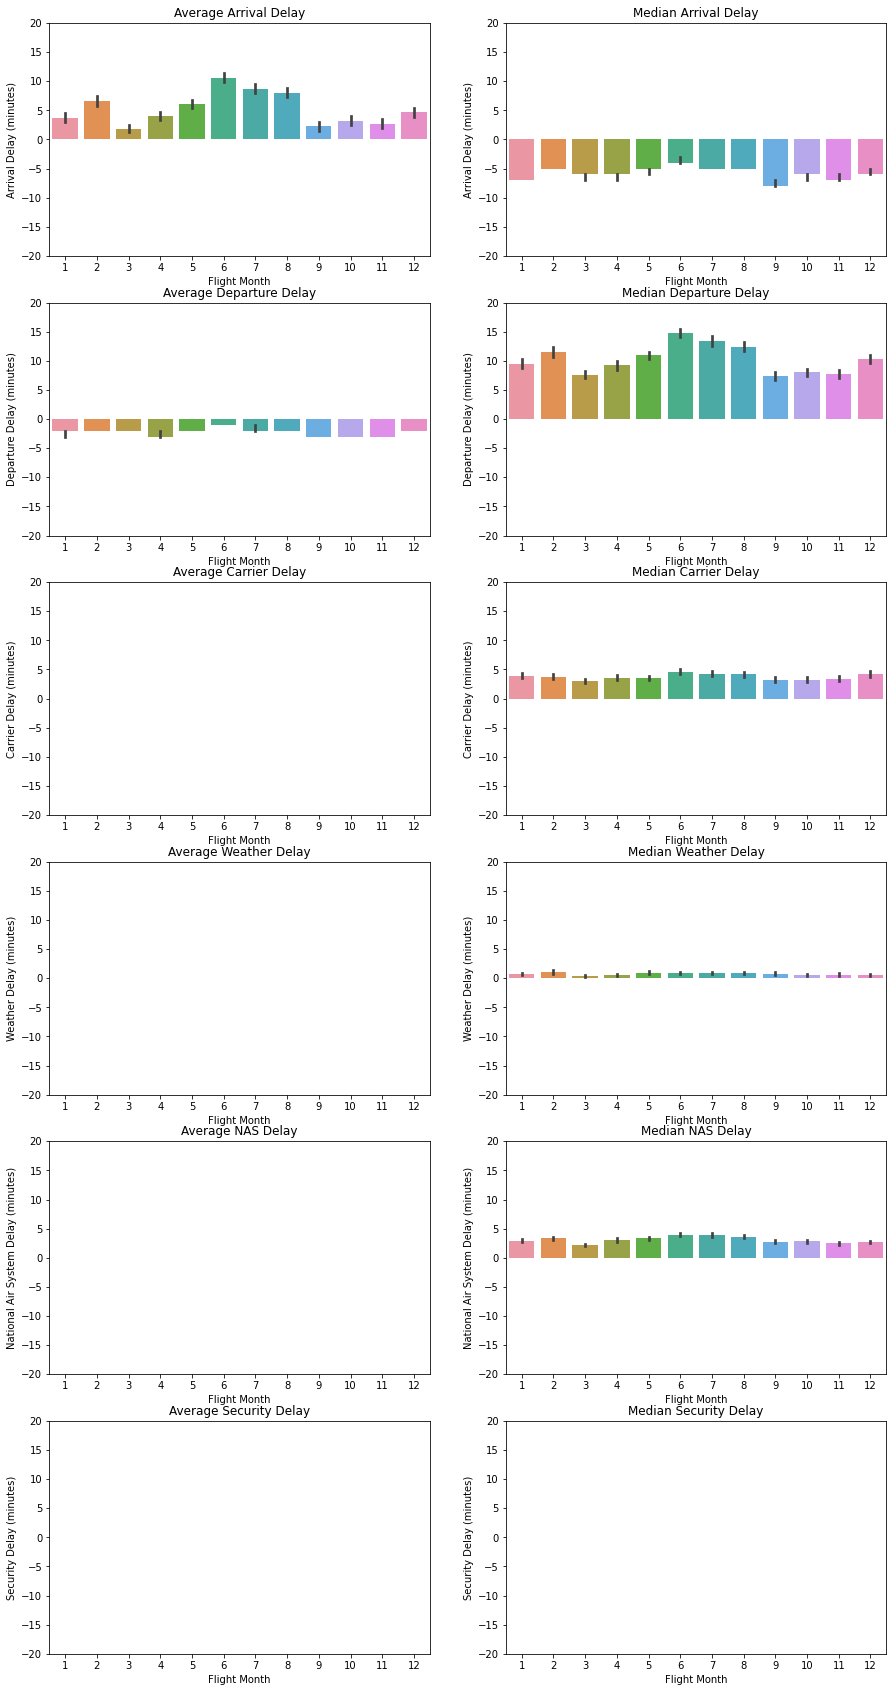

In [5]:
#Make a 6x2 grid of plots, with on each row the average and median delay for each month of arrival delay, departure delay, carrier delay, weather delay, NAS delay, and security delay
fig, ax = plt.subplots(6, 2, figsize=(15, 30))
#fig.suptitle('Average (Left) & Median (Right) Monthly Delay for Arrival and Departure', fontsize=16, fontweight='bold')
sns.barplot(x='Flight Month', y='Arrival Delay (minutes)', data=flights_sample, ax=ax[0,0])
sns.barplot(x='Flight Month', y='Arrival Delay (minutes)', data=flights_sample, ax=ax[0,1], estimator=np.median)
sns.barplot(x='Flight Month', y='Departure Delay (minutes)', data=flights_sample, ax=ax[1,1])
sns.barplot(x='Flight Month', y='Departure Delay (minutes)', data=flights_sample, ax=ax[1,0], estimator=np.median)
sns.barplot(x='Flight Month', y='Carrier Delay (minutes)', data=flights_sample, ax=ax[2,1])
sns.barplot(x='Flight Month', y='Carrier Delay (minutes)', data=flights_sample, ax=ax[2,0], estimator=np.median)
sns.barplot(x='Flight Month', y='Weather Delay (minutes)', data=flights_sample, ax=ax[3,1])
sns.barplot(x='Flight Month', y='Weather Delay (minutes)', data=flights_sample, ax=ax[3,0], estimator=np.median)
sns.barplot(x='Flight Month', y='National Air System Delay (minutes)', data=flights_sample, ax=ax[4,1])
sns.barplot(x='Flight Month', y='National Air System Delay (minutes)', data=flights_sample, ax=ax[4,0], estimator=np.median)
sns.barplot(x='Flight Month', y='Security Delay (minutes)', data=flights_sample, ax=ax[5,1])
sns.barplot(x='Flight Month', y='Security Delay (minutes)', data=flights_sample, ax=ax[5,0], estimator=np.median)

#add title
ax[0,0].set_title('Average Arrival Delay')
ax[0,1].set_title('Median Arrival Delay')
ax[1,0].set_title('Average Departure Delay')
ax[1,1].set_title('Median Departure Delay')
ax[2,0].set_title('Average Carrier Delay')
ax[2,1].set_title('Median Carrier Delay')
ax[3,0].set_title('Average Weather Delay')
ax[3,1].set_title('Median Weather Delay')
ax[4,0].set_title('Average NAS Delay')
ax[4,1].set_title('Median NAS Delay')
ax[5,0].set_title('Average Security Delay')
ax[5,1].set_title('Median Security Delay')

#set y scale
ax[0,1].set(ylim=(-20, 20))
ax[0,0].set(ylim=(-20, 20))
ax[1,1].set(ylim=(-20, 20))
ax[1,0].set(ylim=(-20, 20))
ax[2,1].set(ylim=(-20, 20))
ax[2,0].set(ylim=(-20, 20))
ax[3,1].set(ylim=(-20, 20))
ax[3,0].set(ylim=(-20, 20))
ax[4,1].set(ylim=(-20, 20))
ax[4,0].set(ylim=(-20, 20))
ax[5,1].set(ylim=(-20, 20))
ax[5,0].set(ylim=(-20, 20))
plt.show()


### 1. Carrier Delay
Carrier delay is within the control of the air carrier. Examples of occurrences that may determine carrier delay are: aircraft cleaning, aircraft damage, awaiting the arrival of connecting passengers or crew, baggage, bird strike, cargo loading, catering, computer, outage-carrier equipment, crew legality (pilot or attendant rest), damage by hazardous goods, engineering inspection, fueling, handling disabled passengers, late crew, lavatory servicing, maintenance, oversales, potable water servicing, removal of unruly passenger, slow boarding or seating, stowing carry-on baggage, weight and balance delays. 

### 2. NAS Delay
Delay that is within the control of the National Airspace System (NAS) may include: non-extreme weather conditions, airport operations, heavy traffic volume, air traffic control, etc. Delays that occur after Actual Gate Out are usually attributed to the NAS and are also reported through OPSNET. 

### 3. Weather
Weather delay is caused by extreme or hazardous weather conditions that are forecasted or manifest themselves on point of departure, enroute, or on point of arrival. 

#### **Task 3**: Does the weather affect the delay? 
Use the API to pull the weather information for flights. There is no need to get weather for ALL flights. We can choose the right representative sample. Let's focus on four weather types:
- sunny
- cloudy
- rainy
- snow.
Test the hypothesis that these 4 delays are from the same distribution. If they are not, which ones are significantly different?

#### **Task 4**: How taxi times changing during the day? Does higher traffic lead to bigger taxi times?

In [30]:
#Create a new column for the hour of the day for actual departure time and for wheels on time
#flights_sample['Actual Departure Hour'] = flights_sample['Actual Departure Time (local time)'].dt.hour
#flights_sample['Wheels On Hour'] = flights_sample['Wheels On (local time)'].dt.hour
## Added above

# see info for the new columns (QC)
flights_sample.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199350 entries, 0 to 199349
Data columns (total 39 columns):
 #   Column                                      Non-Null Count   Dtype         
---  ------                                      --------------   -----         
 0   Flight Year                                 199350 non-null  int64         
 1   Flight Month                                199350 non-null  int64         
 2   Flight Day                                  199350 non-null  int64         
 3   Flight Weekday                              199350 non-null  int64         
 4   Marketer - Unique Carrier Code              199350 non-null  object        
 5   Operator - Unique Carrier Code              199350 non-null  object        
 6   Different Marketer & Operator Carrier Code  199350 non-null  int64         
 7   Tail Number                                 199350 non-null  object        
 8   Flight Number                               199350 non-null  int64        

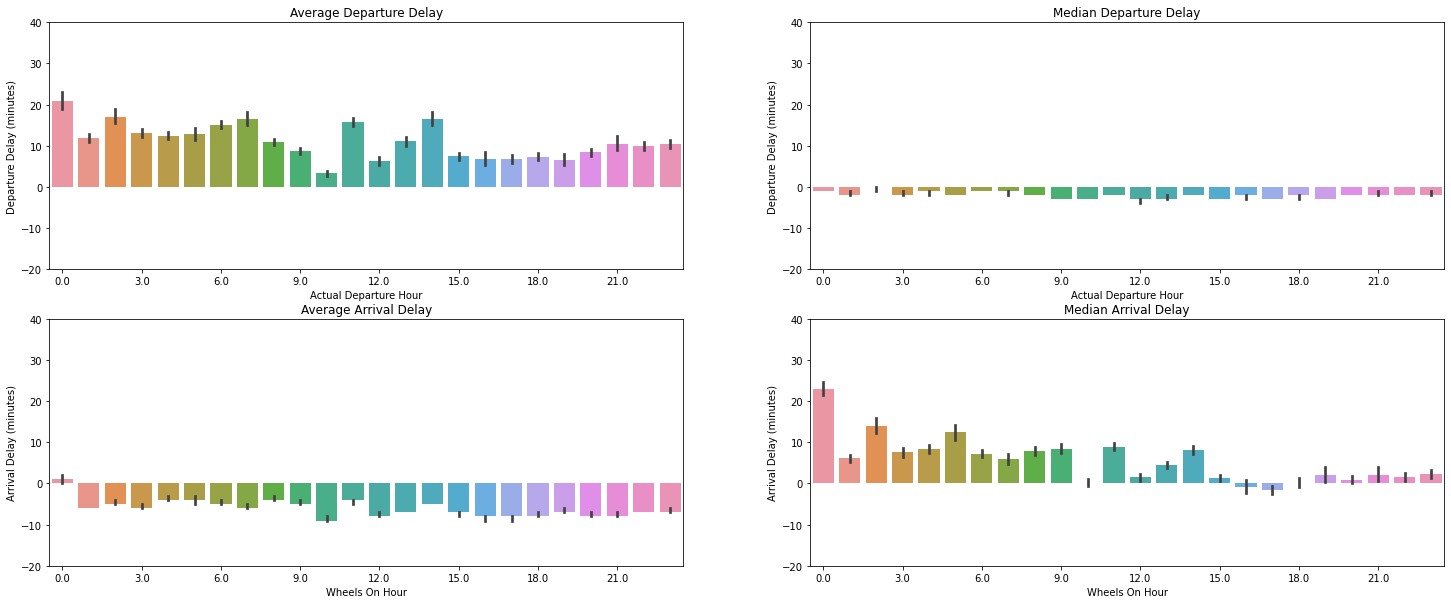

In [31]:
# Plot the average and median departure delay and departure for each hour of the day
fig, ax = plt.subplots(2, 2, figsize=(25, 10))
#fig.suptitle('Average (Left) & Median (Right) Hourly Delay for Departure and Arrival', fontsize=16, fontweight='bold')
sns.barplot(x='Actual Departure Hour', y='Departure Delay (minutes)', data=flights_sample, ax=ax[0,0])
sns.barplot(x='Actual Departure Hour', y='Departure Delay (minutes)', data=flights_sample, ax=ax[0,1], estimator=np.median)
sns.barplot(x='Wheels On Hour', y='Arrival Delay (minutes)', data=flights_sample, ax=ax[1,1])
sns.barplot(x='Wheels On Hour', y='Arrival Delay (minutes)', data=flights_sample, ax=ax[1,0], estimator=np.median)

#add title
ax[0,0].set_title('Average Departure Delay')
ax[0,1].set_title('Median Departure Delay')
ax[1,0].set_title('Average Arrival Delay')
ax[1,1].set_title('Median Arrival Delay')

#set y scale
ax[0,1].set(ylim=(-20, 40))
ax[0,0].set(ylim=(-20, 40))
ax[1,1].set(ylim=(-20, 40))
ax[1,0].set(ylim=(-20, 40))

#Simplify the X axis so it's more readable
ax[0,0].xaxis.set_major_locator(MaxNLocator(integer=True))
ax[0,1].xaxis.set_major_locator(MaxNLocator(integer=True))
ax[1,0].xaxis.set_major_locator(MaxNLocator(integer=True))
ax[1,1].xaxis.set_major_locator(MaxNLocator(integer=True))

plt.show()

What is the difference between average and median in that situation?

#### **Task 5**: What is the average percentage of delays that is already created before departure? (aka are arrival delays caused by departure delays?) Are airlines able to lower the delay during the flights?

In [43]:
# Create a new columns that calculates the difference between the departure delay and arrival delay
#flights_sample['Difference in Delay (Dep - Arr [minutes])'] = flights_sample['Departure Delay (minutes)'] - flights_sample['Arrival Delay (minutes)']
## Added above


In [47]:
# Count the number that have an arrival delay above 0 and divide by the total number of flights *100 for percentage
print("Percentage of flights with departure delays:",flights_sample['Arrival Delay (minutes)'].gt(0).sum()/len(flights_sample)*100)
print("Percentage of flights with arrival delays:",flights_sample['Departure Delay (minutes)'].gt(0).sum()/len(flights_sample)*100)
print()
# Calculate the percentage of flights that have a departure delay bigger & smaller than their arrival delay, using 'Difference in Delay (Dep - Arr [minutes])'
print("Percentage of flights with a departure delay bigger than their arrival delay:",flights_sample['Difference in Delay (Dep - Arr [minutes])'].gt(0).sum()/len(flights_sample)*100)
print("Percentage of flights with a departure delay smaller than their arrival delay:",flights_sample['Difference in Delay (Dep - Arr [minutes])'].lt(0).sum()/len(flights_sample)*100)

Percentage of flights with departure delays: 34.286932530724854
Percentage of flights with arrival delays: 33.60220717331327

Percentage of flights with a departure delay bigger than their arrival delay: 70.05116629044394
Percentage of flights with a departure delay smaller than their arrival delay: 25.82844243792325


In [42]:
# What is the average percentage of delays that is already created by the departure delay?
flights_sample[['Departure Delay (minutes)', 'Arrival Delay (minutes)', 'Difference in Delay (Dep - Arr [minutes])']].describe()

,Departure Delay (minutes),Arrival Delay (minutes),Difference in Delay (Dep - Arr [minutes])
count,199350.000000,199350.000000,199350.000000
mean,10.278580,5.251196,5.027384
std,47.080672,49.151938,14.466710
min,-57.000000,-80.000000,-310.000000
25%,-6.000000,-15.000000,-1.000000
50%,-2.000000,-6.000000,6.000000
75%,6.000000,7.000000,13.000000
max,1861.000000,1861.000000,1134.000000


#### **Task 6**: How many states cover 50% of US air traffic? 

In [70]:
# Create Departure & Arrival State column
flights_sample['Departure State'] = flights_sample['Origin Airport (City, State)'].str[-2:]
flights_sample['Arrival State'] = flights_sample['Destination Airport (City, State)'].str[-2:]

# Show the States that account for 50% of the total traffic
arrival_traffic = flights_sample['Arrival State'].value_counts().sort_values(ascending=False)/len(flights_sample)*100
departure_traffic = flights_sample['Departure State'].value_counts().sort_values(ascending=False)/len(flights_sample)*100

#loop through the arrival traffic and add them together until we reach 50%
total_traffic = 0
for i in range(len(arrival_traffic)):
    total_traffic += arrival_traffic[i]
    if total_traffic > 50:
        print("States that account for 50% of the total arrival traffic:",'\n')
        print(arrival_traffic.index[:i+1])
        break

print('\n\n')
        
#loop through the departure traffic and add them together until we reach 50%
total_traffic = 0
for i in range(len(departure_traffic)):
    total_traffic += departure_traffic[i]
    if total_traffic > 50:
        print("States that account for 50% of the total departure traffic:",'\n')
        print(departure_traffic.index[:i+1])
        break
        

States that account for 50% of the total arrival traffic: 

Index(['CA', 'TX', 'FL', 'IL', 'GA', 'NY', 'NC', 'CO'], dtype='object')



States that account for 50% of the total departure traffic: 

Index(['CA', 'TX', 'FL', 'IL', 'GA', 'NY', 'NC', 'CO'], dtype='object')


#### **Task 7**: Test the hypothesis whether planes fly faster when there is the departure delay? 

In [ ]:
#Skip

#### **Task 8**: When (which hour) do most 'LONG', 'SHORT', 'MEDIUM' haul flights take off?

In [76]:
#Short haul flights: Less than 3 hrs
#Medium Haul flights: 3-6hrs
#long Haul flights: More than 6hrs

# Create a new column 'Flight Haul Type' that calculates the flight duration in hours and assigns 1[short],2[medium],3[long] to the new column depending on the flight duration
flights_sample['Flight Haul Type'] = flights_sample['Air Time'].apply(lambda x: 1 if x < 180 else (2 if x < 360 else 3))

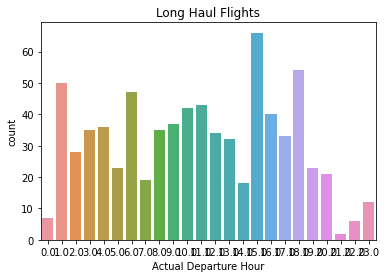

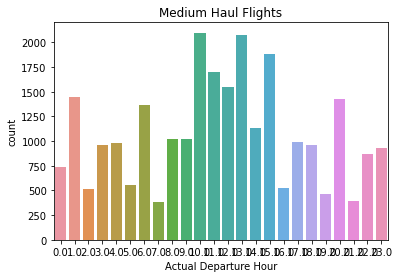

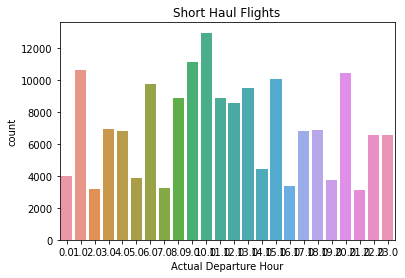

In [80]:
# visualize each type of haul flights by hour (Actual Departure Hour) in a bar plot
sns.countplot(x='Actual Departure Hour', data=flights_sample[flights_sample['Flight Haul Type'] == 3])
plt.title('Long Haul Flights')
plt.show()

sns.countplot(x='Actual Departure Hour', data=flights_sample[flights_sample['Flight Haul Type'] == 2])
plt.title('Medium Haul Flights')
plt.show()

sns.countplot(x='Actual Departure Hour', data=flights_sample[flights_sample['Flight Haul Type'] == 1])
plt.title('Short Haul Flights')
plt.show()

#### **Task 9**: Find the top 10 the bussiest airports. Does the biggest number of flights mean that the biggest number of passengers went through the particular airport? How much traffic do these 10 airports cover?

#### **Task 10**: Do bigger delays lead to bigger fuel comsumption per passenger? 
We need to do four things to answer this as accurate as possible:
- Find out average monthly delay per air carrier (monthly delay is sum of all delays in 1 month)
- Find out distance covered monthly by different air carriers
- Find out number of passengers that were carried by different air carriers
- Find out total fuel comsumption per air carrier.

Use this information to get the average fuel comsumption per passenger per km. Is this higher for the airlines with bigger average delays?